# Task 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma

In [9]:
#a random samples
def generate_samples (N):
    np.random.seed(0)
    N = 20
    mu_true = 0
    tau_true = 1
    return np.random.normal(mu_true, 1/np.sqrt(tau_true), N)


In [10]:
#b helper functions
def evaluate_q_mu(mu_N, lambda_N):
    return norm.pdf, {'loc': mu_N, 'scale': 1/np.sqrt(lambda_N)}

def evaluate_q_tau(a_N, b_N):
    return gamma.pdf, {'a': a_N, 'scale': 1/b_N}

In [22]:
#c implementation

def mean_field_inference(num_samples=20, iter_max=50):
    X = generate_samples(num_samples)
    N = num_samples
    mu_N = 0
    lambda_N = 1.2
    a_N = 1
    b_N = 1
    for iter in range(1, iter_max + 1):
        # Update q_mu
        lambda_N = (N * a_N / b_N) + 1.2
        mu_N = (sum(X) * a_N / b_N) / lambda_N
        
        # Update q_tau
        a_N = N/2 + 1
        b_N = 0.5 * sum((X - mu_N)**2) + 1
        
        # Stopping condition
        if iter == iter_max:
            break
    
    return mu_N, lambda_N, a_N, b_N

# Run mean field inference
mu_N, lambda_N, a_N, b_N = mean_field_inference()
print('mu =', mu_N, 'lambda = ', lambda_N, 'a =', a_N, 'b =', b_N)

mu = 0.5448630217945399 lambda =  27.918171143016338 a = 11.0 b = 8.23409651889681


In [21]:
# d. Change iter_max or N and observe results (skipped for brevity)
mu_N, lambda_N, a_N, b_N = mean_field_inference(20, 100)
print('mu =', mu_N, 'lambda = ', lambda_N, 'a =', a_N, 'b =', b_N)

mu = 0.5448630217945399 lambda =  27.918171143016338 a = 11.0 b = 8.23409651889681


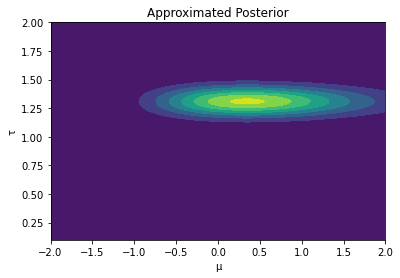

In [6]:
# e. Kullback-Leibler Divergence (to be done in task 2)

# f. Plotting
mu_vals = np.linspace(-2, 2, 100)
tau_vals = np.linspace(0.1, 2, 100)
mu_mesh, tau_mesh = np.meshgrid(mu_vals, tau_vals)
true_posterior = np.zeros(mu_mesh.shape)
approx_posterior = np.zeros(mu_mesh.shape)

for i in range(mu_vals.size):
    for j in range(tau_vals.size):
        _, q_mu_params = evaluate_q_mu(mu_N, lambda_N)
        _, q_tau_params = evaluate_q_tau(a_N, b_N)
        approx_posterior[i, j] = norm.pdf(mu_vals[i], **q_mu_params) * gamma.pdf(tau_vals[j], **q_tau_params)

plt.contourf(mu_mesh, tau_mesh, approx_posterior, cmap='viridis')
plt.xlabel('μ')
plt.ylabel('τ')
plt.title('Approximated Posterior')
plt.show()

# g. Additional stopping criteria can be based on the change in parameters or likelihood (not implemented here)
